In [13]:
import numpy as np 
import pandas as pd

In [14]:
# Reading a training data values

dataset = pd.read_csv('/content/GLD_from_prof.csv')

# Training data for column - Open
training_set = dataset.iloc[:, 1:2].values
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
1,2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2,2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
3,2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
4,2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100


In [15]:
# Preprocessing data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# Training data for 'Open' column
x_train = list()
y_train = list()
for i in range(60,4009):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [18]:
# Model for Predicting 'Open' Values
open_model = Sequential()
open_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50,return_sequences=True))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50,return_sequences=True))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50))
open_model.add(Dropout(0.2))
open_model.add(Dense(units=1))
open_model.compile(optimizer='adam', loss='mean_squared_error')
open_model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0194
Epoch 2/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0037
Epoch 3/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0032
Epoch 4/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0031
Epoch 5/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0026
Epoch 8/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0024
Epoch 9/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0022
Epoch 11/100
62/62 [==============================] - 8s 121ms/step - loss: 0.0023
Epoch 12/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0021
Epoch 13/100


In [19]:
# Reading TEST dataset
dataset_test = pd.read_csv('/content/GLD_test_evaluate.csv')
test_set = dataset_test.iloc[:, 1:2].values # Reading values for column - 'Open'
test_set.shape

(31, 1)

In [20]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

# Passing values as only one datapoint to test data to get predictions for one i.e next day.
x_test = list()
for i in range(60, 91):
  x_test.append(inputs[i-60:i, 0])

In [21]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_open_price = open_model.predict(x_test)
predicted_open_price = sc.inverse_transform(predicted_open_price)

In [22]:
predicted_open_price

array([[175.71767],
       [175.63017],
       [175.25842],
       [174.87633],
       [174.69057],
       [173.95282],
       [172.63605],
       [172.29672],
       [172.94756],
       [174.19308],
       [175.04228],
       [175.83969],
       [177.21007],
       [176.04639],
       [173.79222],
       [171.71948],
       [171.26176],
       [172.50931],
       [173.78246],
       [174.1061 ],
       [173.37952],
       [171.88051],
       [171.31099],
       [171.42517],
       [169.81863],
       [167.77112],
       [165.69722],
       [164.37874],
       [164.97205],
       [166.6573 ],
       [168.52376]], dtype=float32)

Model for predicting values for 'High' values of GOLD dataset.

In [23]:
# Getting values for "High" Column for training
training_set = dataset.iloc[:, 2:3].values
dataset.head()
x_train = list()
y_train = list()
for i in range(60,4009):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Model for Predicting High Values
high_model = Sequential()
high_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
high_model.add(Dropout(0.2))
high_model.add(LSTM(units=50,return_sequences=True))
high_model.add(Dropout(0.2))
high_model.add(LSTM(units=50,return_sequences=True))
high_model.add(Dropout(0.2))
high_model.add(LSTM(units=50))
high_model.add(Dropout(0.2))
high_model.add(Dense(units=1))
high_model.compile(optimizer='adam', loss='mean_squared_error')
high_model.fit(x_train,y_train,epochs=100,batch_size=64)


# Getting values for "High" Column for training
dataset_total = pd.concat((dataset['High'], dataset_test['High']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = list()

for i in range(60, 91): 
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Prediction for "High"
predicted_high_price = high_model.predict(x_test)
predicted_high_price = sc.inverse_transform(predicted_high_price)

Epoch 1/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0215
Epoch 2/100
62/62 [==============================] - 8s 124ms/step - loss: 0.0035
Epoch 3/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0033
Epoch 4/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0031
Epoch 5/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0031
Epoch 6/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0029
Epoch 7/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0026
Epoch 8/100
62/62 [==============================] - 7s 115ms/step - loss: 0.0027
Epoch 9/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0026
Epoch 10/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0023
Epoch 11/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0022
Epoch 12/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0021
Epoch 13/100


In [24]:
predicted_high_price

array([[178.56651],
       [178.33119],
       [177.67566],
       [177.23695],
       [177.32133],
       [176.78036],
       [175.6853 ],
       [175.22037],
       [175.63692],
       [176.70299],
       [177.39471],
       [178.74712],
       [180.15144],
       [178.5264 ],
       [175.98756],
       [174.19951],
       [174.32845],
       [175.70119],
       [176.7028 ],
       [176.50067],
       [175.53453],
       [174.29144],
       [173.97159],
       [174.07278],
       [172.35239],
       [170.29611],
       [168.43166],
       [167.31001],
       [167.9128 ],
       [169.5174 ],
       [170.9091 ]], dtype=float32)

Model for predicting values for 'Low' values of GOLD dataset.

In [25]:
# Getting values for "Low" Column for training
training_set = dataset.iloc[:, 3:4].values
dataset.head()
x_train = list()
y_train = list()
for i in range(60,4009):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Model for Predicting Low Values
low_model = Sequential()
low_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
low_model.add(Dropout(0.2))
low_model.add(LSTM(units=50,return_sequences=True))
low_model.add(Dropout(0.2))
low_model.add(LSTM(units=50,return_sequences=True))
low_model.add(Dropout(0.2))
low_model.add(LSTM(units=50))
low_model.add(Dropout(0.2))
low_model.add(Dense(units=1))
low_model.compile(optimizer='adam', loss='mean_squared_error')
low_model.fit(x_train,y_train,epochs=100,batch_size=64)


# Getting values for "Low" Column for training
dataset_total = pd.concat((dataset['Low'], dataset_test['Low']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = list()

for i in range(60, 91): 
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Prediction for "Low"
predicted_low_price = low_model.predict(x_test)
predicted_low_price = sc.inverse_transform(predicted_low_price)

Epoch 1/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0197
Epoch 2/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0039
Epoch 3/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0032
Epoch 4/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0033
Epoch 5/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0029
Epoch 6/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0027
Epoch 7/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0026
Epoch 8/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0026
Epoch 9/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0024
Epoch 10/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0024
Epoch 11/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0023
Epoch 12/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0021
Epoch 13/100


In [26]:
predicted_low_price

array([[177.11537],
       [176.61937],
       [175.85591],
       [175.67389],
       [175.96669],
       [174.89955],
       [173.5944 ],
       [173.4224 ],
       [174.2841 ],
       [175.49344],
       [175.77057],
       [176.95311],
       [178.41742],
       [175.35738],
       [173.2662 ],
       [172.4143 ],
       [173.13574],
       [174.4595 ],
       [175.13   ],
       [174.68993],
       [173.70049],
       [172.56815],
       [172.6597 ],
       [171.5836 ],
       [169.32458],
       [167.95891],
       [166.65216],
       [165.6004 ],
       [166.43796],
       [167.87283],
       [168.9603 ]], dtype=float32)

Model for predicting values for 'Close' values of GOLD dataset.

In [27]:
# Getting values for "Close" Column for training
training_set = dataset.iloc[:, 4:5].values
dataset.head()
x_train = list()
y_train = list()
for i in range(60,4009):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Model for Predicting Close Values
close_model = Sequential()
close_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50,return_sequences=True))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50,return_sequences=True))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50))
close_model.add(Dropout(0.2))
close_model.add(Dense(units=1))
close_model.compile(optimizer='adam', loss='mean_squared_error')
close_model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0213
Epoch 2/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0035
Epoch 3/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0030
Epoch 5/100
62/62 [==============================] - 7s 121ms/step - loss: 0.0028
Epoch 6/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0030
Epoch 7/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0027
Epoch 8/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0025
Epoch 9/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0023
Epoch 10/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0023
Epoch 11/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0025
Epoch 12/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0023
Epoch 13/100


In [28]:

# Getting values for "Close" Column for training
dataset_total = pd.concat((dataset['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = list()

for i in range(60, 91): 
  x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Prediction for "Close"
predicted_close_price = close_model.predict(x_test)
predicted_close_price = sc.inverse_transform(predicted_close_price)

In [29]:
predicted_close_price

array([[176.49232],
       [176.52374],
       [176.16643],
       [175.77539],
       [175.69125],
       [174.78873],
       [173.66954],
       [173.18315],
       [173.71964],
       [174.78334],
       [175.56369],
       [177.30078],
       [178.80028],
       [176.77477],
       [174.44159],
       [172.71985],
       [172.29483],
       [172.97185],
       [173.80594],
       [174.11334],
       [173.72328],
       [173.08801],
       [172.77806],
       [171.5806 ],
       [169.62259],
       [168.09004],
       [166.78911],
       [165.69717],
       [166.17438],
       [167.54843],
       [169.13744]], dtype=float32)

In [30]:
dataset_evaluate = pd.read_csv('/content/GLD_test_evaluate.csv')

open_evaluation_set = dataset_evaluate.iloc[:, 1:2].values # Reading values for column - 'Open'
high_evaluation_set = dataset_evaluate.iloc[:, 2:3].values # Reading values for column - 'High'
low_evaluation_set = dataset_evaluate.iloc[:, 3:4].values # Reading values for column - 'Low'
close_evaluation_set = dataset_evaluate.iloc[:, 4:5].values # Reading values for column - 'Close'

In [31]:
import matplotlib.pyplot as plt

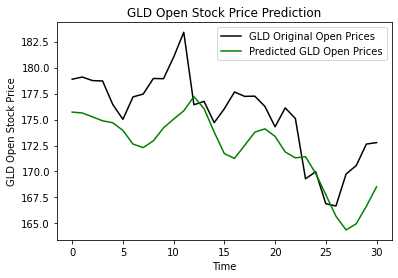

In [32]:
plt.plot(open_evaluation_set, color = 'black', label = 'GLD Original Open Prices')
plt.plot(predicted_open_price, color = 'green', label = 'Predicted GLD Open Prices')
plt.title('GLD Open Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('GLD Open Stock Price')

plt.legend()
plt.show()

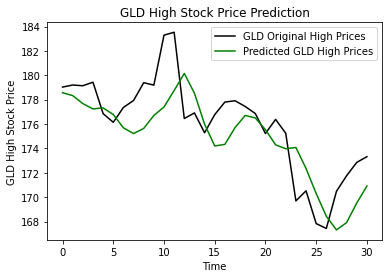

In [37]:
plt.plot(high_evaluation_set, color = 'black', label = 'GLD Original High Prices')
plt.plot(predicted_high_price, color = 'green', label = 'Predicted GLD High Prices')
plt.title('GLD High Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('GLD High Stock Price')

plt.legend()
plt.show()

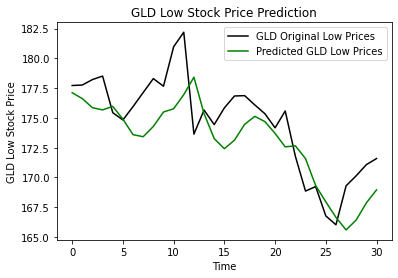

In [38]:
plt.plot(low_evaluation_set, color = 'black', label = 'GLD Original Low Prices')
plt.plot(predicted_low_price, color = 'green', label = 'Predicted GLD Low Prices')
plt.title('GLD Low Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('GLD Low Stock Price')

plt.legend()
plt.show()

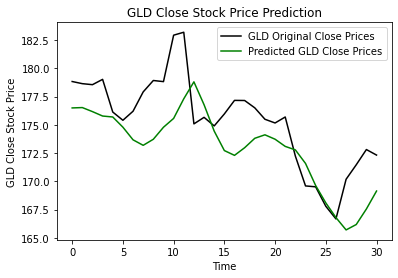

In [39]:
plt.plot(close_evaluation_set, color = 'black', label = 'GLD Original Close Prices')
plt.plot(predicted_close_price, color = 'green', label = 'Predicted GLD Close Prices')
plt.title('GLD Close Stock Price Prediction')

plt.xlabel('Time')
plt.ylabel('GLD Close Stock Price')

plt.legend()
plt.show()